## Performing Wavelet transform and clustering on image data

In [1]:
import pywt as pw
from PIL import Image as im
import numpy as np
import glob
import os
import matplotlib.pyplot as plt
from resizeimage import resizeimage

In [2]:
def get_images(path):
    images = []
    for img in glob.glob(path):
        imgs = im.open(img)
#         imgs = im.open(img).convert('L')
        if img is not None:
            images.append(imgs)
    return images    

def perform_waveletTransform(images,wavelet_type,level):
    a1=[]
    for img in images:
        imarray=np.array(img)
        coeffs = pw.wavedec2(imarray, wavelet_type,level=level)
        a1.append(coeffs[0])
    return a1

def relative_2_norm_error(database_image,new_image):
    return np.sqrt(np.sum(np.square(np.subtract(new_image,database_image))))/np.sqrt(np.sum(np.square(new_image)))   

# claculates relative norm error between a list of training images  and a test image
def relative_norm(Trend_training,Trend_Test):
    relative_norm=[]
    for image in Trend_training:
        relative_norm.append(relative_2_norm_error(image,Trend_Test))
    return  np.array(relative_norm)


def resize_images(images,dimension1,dimension2):
    resized_image=[]
    for image in images:
        resized_image.append(resizeimage.resize_cover(image, [dimension1, dimension2], validate=False))
    return resized_image    
        

In [3]:
training_path="/home/ppatnaik/pradosa/Training_set/*"
tag_path="/home/ppatnaik/pradosa/Training_Set/"
images1=get_images(training_path)
images=resize_images(images1,200,200)
wavelet_type='Haar'
level=[1,0]
transform_level=7
Trend_training=[]
for i in range(len(level)):
    Trend_training.append(np.array(perform_waveletTransform(images,wavelet_type,level[i])))
    


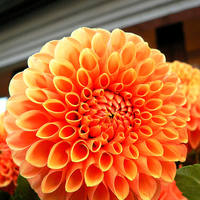

In [4]:
images[1]

In [95]:
input_data= Trend_training[0]  
X=[]
for data in input_data:
    X.append(data.flatten())  
    
X=np.array(X)    

In [ ]:
Trend_training[1][1].shape

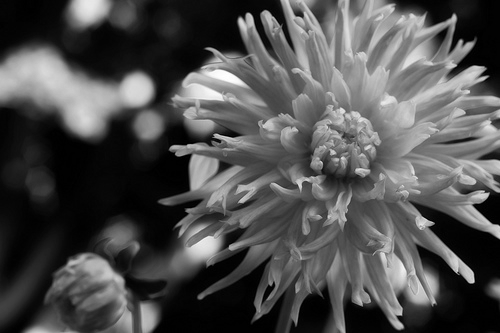

In [96]:
images1[0].convert('L')

In [90]:
pixel_values = images1[0].getcolors()
pixel_values

In [58]:
imarray=np.array(images[0])

In [67]:
print(imarray[:,0].shape)
imarray[:,:,2]

(200, 3)


array([[204, 206, 207, ...,   0,   1,   1],
       [206, 206, 207, ...,   2,   0,   1],
       [205, 207, 206, ...,   6,   5,   3],
       ..., 
       [ 17,  16,  14, ...,  26,  21,  18],
       [ 13,  15,  15, ...,  24,  21,  17],
       [ 14,  16,  13, ...,  22,  20,  17]], dtype=uint8)

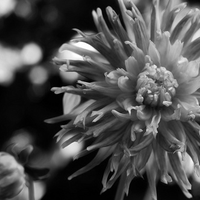

In [70]:
im.fromarray(imarray[:,:,1])

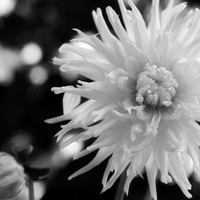

In [78]:
im.fromarray(imarray[:,:,0],'P')

In [79]:
x=images1[0].split()

In [87]:
x[2].show()

## Affinity propagation

In [1374]:
from sklearn.cluster import AffinityPropagation
from sklearn import metrics

In [1468]:
af = AffinityPropagation(damping=0.85,max_iter=20,convergence_iter=50).fit(X)
cluster_centers_indices = af.cluster_centers_indices_
labels = af.labels_                                                                                                                  
n_clusters_ = len(cluster_centers_indices)
print('Estimated number of clusters: %d' % n_clusters_)

Estimated number of clusters: 3


In [1054]:
len(labels[labels==1])

25

In [1281]:
cluster_centers_indices

array([35, 48, 55, 94], dtype=int64)

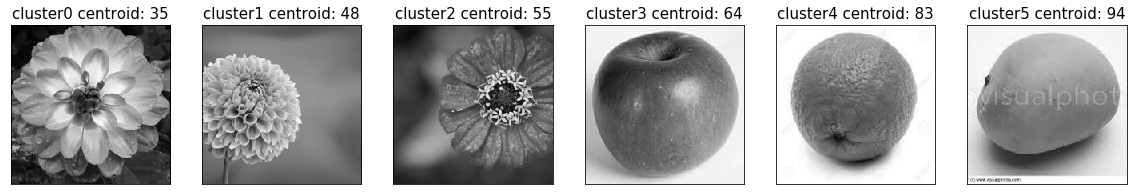

In [1376]:
%matplotlib inline
fig = plt.figure(figsize=(20, 8))
for i in range(len(cluster_centers_indices)):
    ax=fig.add_subplot(1, len(cluster_centers_indices), i+1)
    plt.imshow(images[cluster_centers_indices[i]],cmap='gray')
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False) 
    ax.set_xlabel('x')
    ax.set_title('cluster' + str(i) + ' centroid: '+ str(cluster_centers_indices[i]),fontsize=15)
plt.show() 

In [1469]:
img = images
c0=[]
c1=[]
c2=[]
c3=[]
c4=[]
c5=[]
for i in range(len(labels)):
    if(labels[i]==0):
        c0.append(X[i])
    elif(labels[i]==1):
        c1.append(X[i])
    elif(labels[i]==2):
        c2.append(X[i])
    elif(labels[i]==3):  
        c3.append(X[i])
    elif(labels[i]==4):  
        c4.append(X[i])
    elif(labels[i]==5):  
        c5.append(X[i])    

In [ ]:
k_list=[]

k_list.append(np.array(c0))
k_list.append(np.array(c1))
k_list.append(np.array(c2))
# k_list.append(np.array(c3)) 
# k_list.append(np.array(c4))
# k_list.append(np.array(c5))

In [791]:
type(k_list[3])

numpy.ndarray

## Internal validity criteria 

In [1473]:
Dunn_index_fast=dunn_fast(X,labels)
print ('Dunn Index:'+ str(Dunn_index_fast))
DB_index=davisbouldin(k_list,cluster_centers_indices)
print ('Davisbouldin Index:' + str(DB_index))

Dunn Index:0.254860735898
Davisbouldin Index:2228.75788227


In [1380]:
img = images
c0=[]
c1=[]
c2=[]
c3=[]
c4=[]
c5=[]
for i in range(len(labels)):
    if(labels[i]==0):
        c0.append(images[i])
    elif(labels[i]==1):
        c1.append(images[i])
    elif(labels[i]==2):
        c2.append(images[i])
    elif(labels[i]==3):  
        c3.append(images[i])
    elif(labels[i]==4):  
        c4.append(images[i])
    elif(labels[i]==5):  
        c5.append(images[i])

In [ ]:
cluster_centers_indices

In [1344]:
img = images
c0=[]
c1=[]
c2=[]
c3=[]
c4=[]
c5
for i in range(len(labels)):
    if(labels[i]==0):
        c0.append(images1[i])
    elif(labels[i]==1):
        c1.append(images1[i])
    elif(labels[i]==2):
        c2.append(images1[i])
    elif(labels[i]==3):  
        c3.append(images1[i])
    elif(labels[i]==4):  
        c4.append(images1[i])

In [ ]:
len(labels[labels==1])
len(c2)
labels[5]

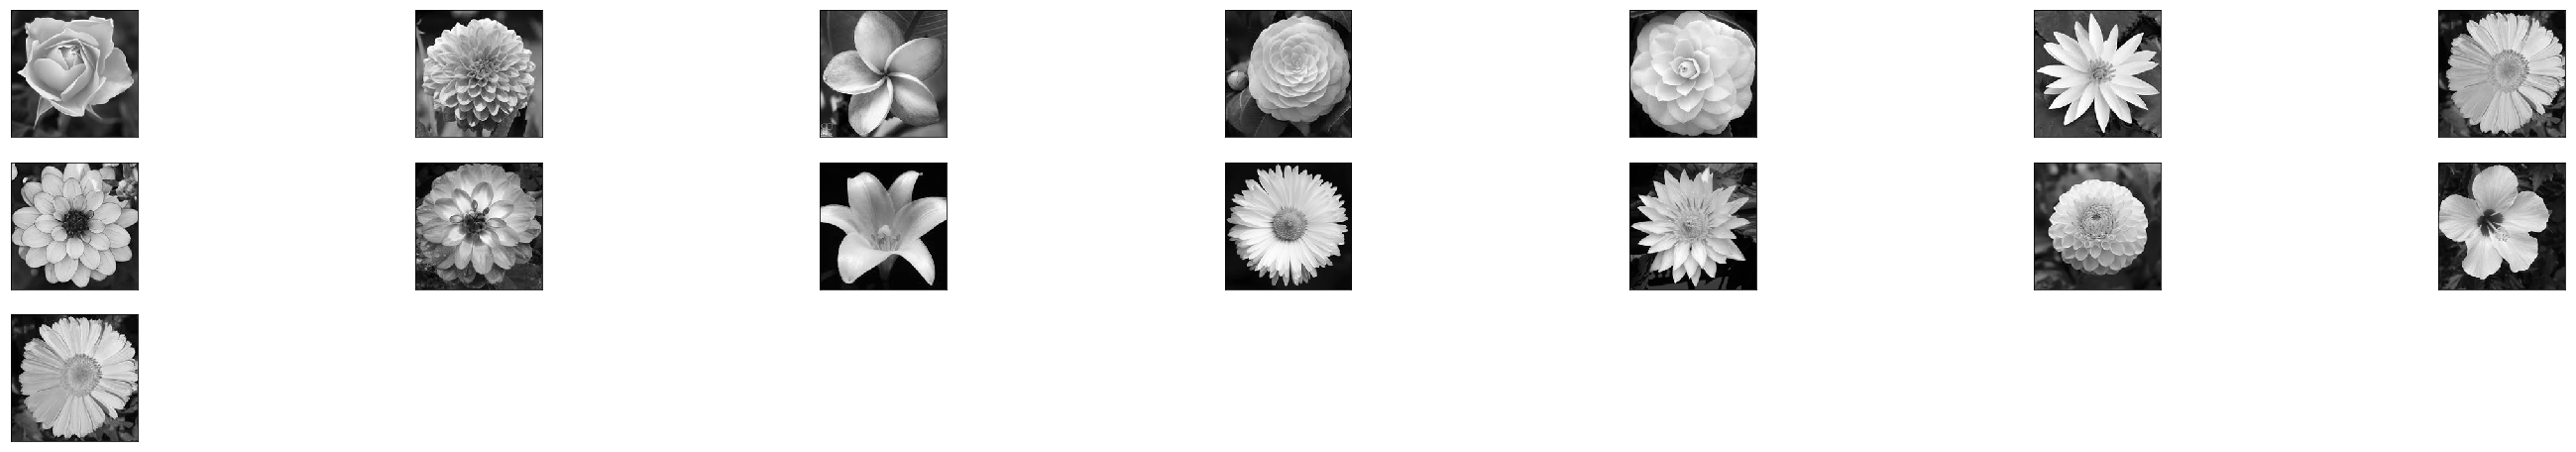

In [1381]:
fig = plt.figure(figsize=(50, 8))
for i in range(len(c0)):
    ax=fig.add_subplot(3,len(c0)/2, i+1)
    plt.imshow(c0[i],cmap='gray')
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)   
plt.show()    

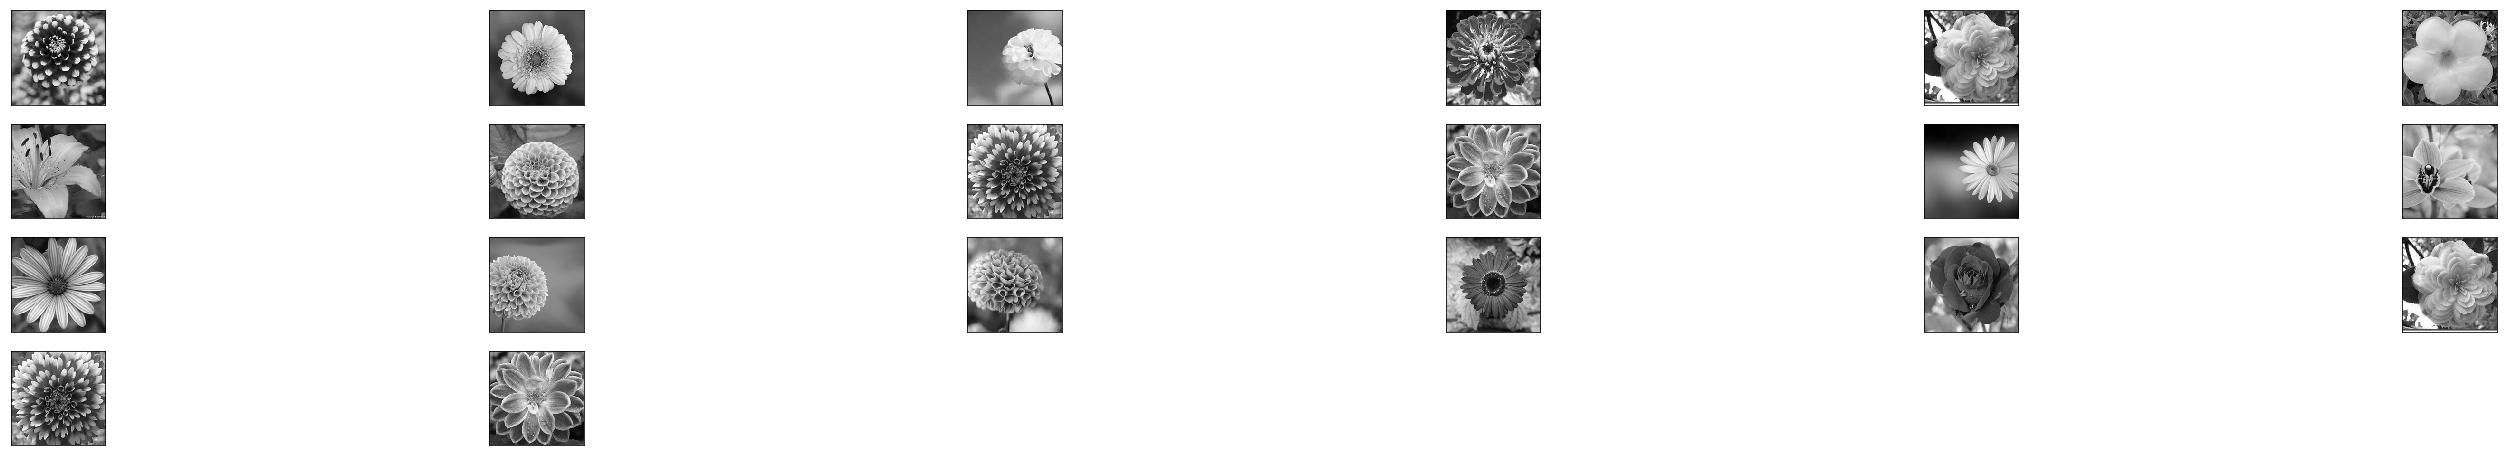

In [1383]:
fig = plt.figure(figsize=(50, 8))
for i in range(len(c1)):
    ax=fig.add_subplot(4, len(c1)/3, i+1)
    plt.imshow(c1[i],cmap='gray')
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)   
plt.show() 

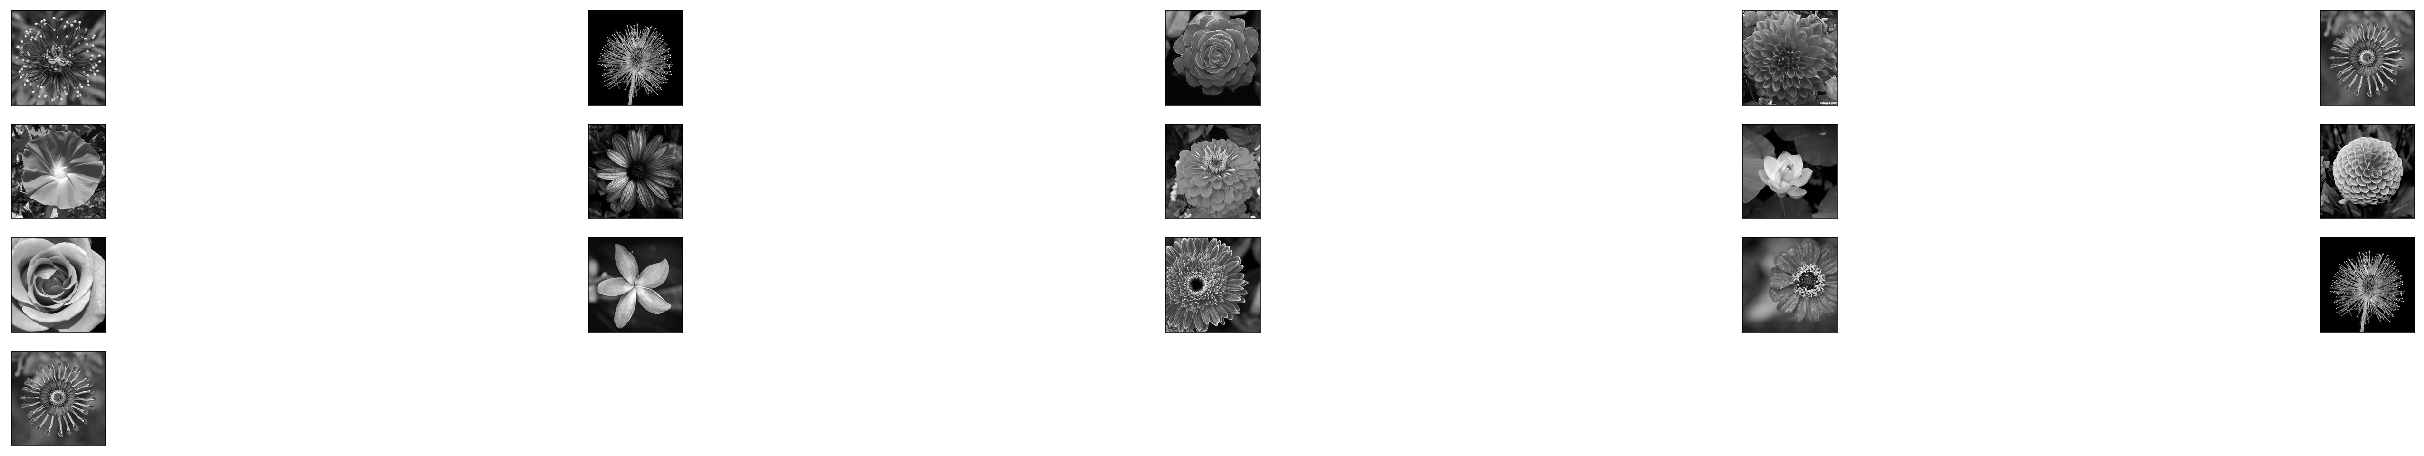

In [1384]:
fig = plt.figure(figsize=(50, 8))
for i in range(len(c2)):
    ax=fig.add_subplot(4, (len(c2)+1)/3, i+1)
    plt.imshow(c2[i],cmap='gray')
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)   
plt.show() 

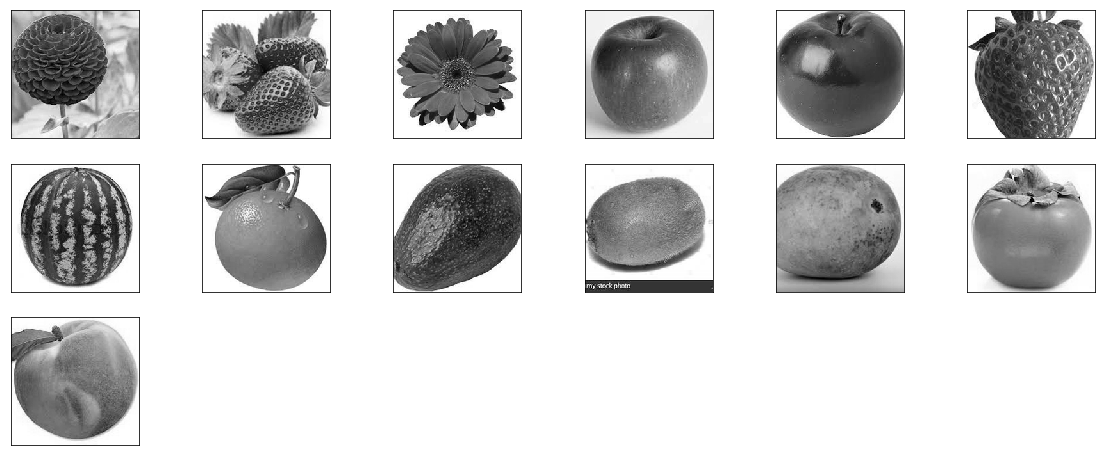

In [1385]:
fig = plt.figure(figsize=(20, 8))
for i in range(len(c3)):
    ax=fig.add_subplot(3,len(c3)/2, i+1)
    plt.imshow(c3[i],cmap='gray')
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)   
plt.show() 

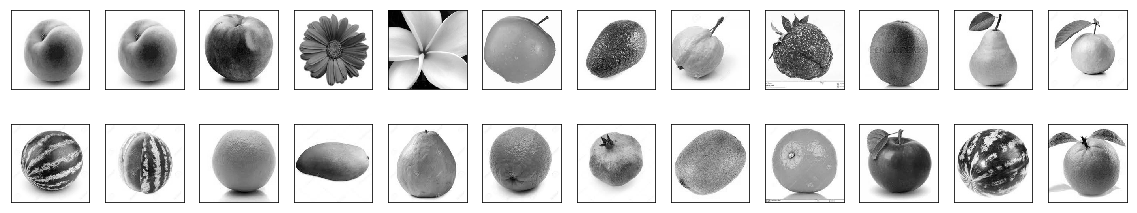

In [1386]:
fig = plt.figure(figsize=(20, 8))
for i in range(len(c4)):
    ax=fig.add_subplot(4, len(c4)/2, i+1)
    plt.imshow(c4[i],cmap='gray')
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)   
plt.show()

In [1043]:
fig = plt.figure(figsize=(20, 8))
for i in range(len(c5)):
    ax=fig.add_subplot(4, len(c5)/2, i+1)
    plt.imshow(c5[i],cmap='gray')
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)   
plt.show()

## PCA 

In [1387]:
X=np.array(X)
>>> from sklearn.decomposition import PCA
>>> pca = PCA(n_components=3).fit(X)
>>> pca_2d = pca.transform(X)

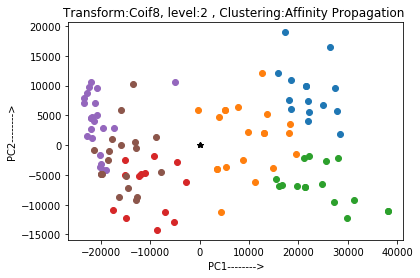

In [1388]:
for i in range(len(cluster_centers_indices)):
    # select only data observations with cluster label == i
    ds = pca_2d[np.where(labels==i)]
    # plot the data observations
    plt.plot(ds[:,0],ds[:,1],'o')
    # plot the centroids
    #lines = plt.plot(centroids[i,0],centroids[i,1],'kx')
#     # make the centroid x's bigger
#     plt.setp(lines,ms=15.0)
#     plt.setp(lines,mew=2.0)
    plt.xlabel('PC1-------->')
    plt.ylabel('PC2-------->')
    plt.title('Transform:Coif8, level:2 , Clustering:Affinity Propagation ')
plt.plot(pca_2d.mean(axis=0),'*',color='K')    
plt.show()

<IPython.core.display.Javascript object>


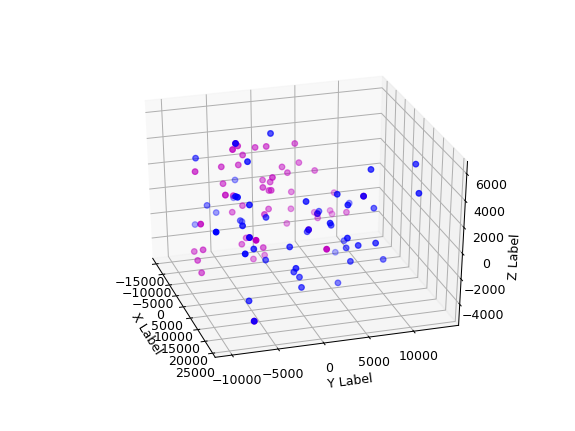

In [1193]:
%matplotlib notebook

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np


def randrange(n, vmin, vmax):
    '''
    Helper function to make an array of random numbers having shape (n, )
    with each number distributed Uniform(vmin, vmax).
    '''
    return (vmax - vmin)*np.random.rand(n) + vmin

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

n = 100

# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
# for c, m, zlow, zhigh in [('r', 'o', -50, -25), ('b', '^', -30, -5)]:
ds1 = pca_2d[0:len(pca_2d)/2]
ds2 = pca_2d[len(pca_2d)/2:]
xs1 =ds1[:,0]
ys1 = ds1[:,1]
zs1 = ds1[:,2]
xs2 =ds2[:,0]
ys2 = ds2[:,1]
zs2 = ds2[:,2]
ax.scatter(xs1, ys1, zs1, c=c, marker='o')
ax.scatter(xs2, ys2, zs2, c='m', marker='o')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')


for angle in range(0, 360):
        ax.view_init(30, angle)
plt.show()


plt.show()

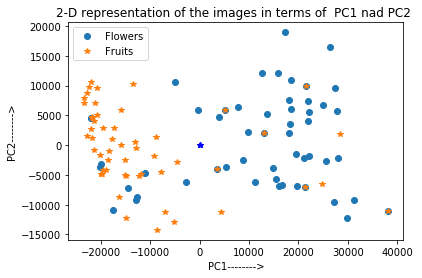

In [1391]:
# for i in range(2):
    # select only data observations with cluster label == i
ds1 = pca_2d[0:len(pca_2d)/2]
ds2 = pca_2d[len(pca_2d)/2:]
    # plot the data observations
plt.plot(ds1[:,0],ds1[:,1],'o',label='Flowers')
plt.plot(ds2[:,0],ds2[:,1],'*',label='Fruits')
plt.xlabel('PC1-------->')
plt.ylabel('PC2-------->')
    # plot the centroids
    #lines = plt.plot(centroids[i,0],centroids[i,1],'kx')
#     # make the centroid x's bigger
#     plt.setp(lines,ms=15.0)
#     plt.setp(lines,mew=2.0)
plt.legend()
plt.title('2-D representation of the images in terms of  PC1 nad PC2 ')
plt.plot(pca_2d.mean(axis=0),'*',color='b')    
plt.show()

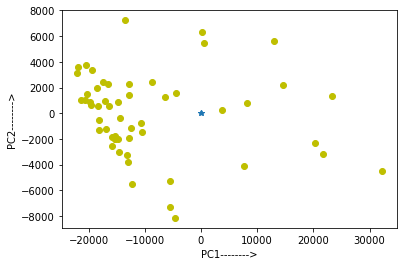

In [1163]:
ds = pca_2d[len(pca_2d)/2:]
    # plot the data observations
plt.plot(ds[:,0],ds[:,1],'o',color='y')
    # plot the centroids
    #lines = plt.plot(centroids[i,0],centroids[i,1],'kx')
#     # make the centroid x's bigger
#     plt.setp(lines,ms=15.0)
#     plt.setp(lines,mew=2.0)
plt.xlabel('PC1-------->')
plt.ylabel('PC2-------->')    
plt.plot(pca_2d.mean(axis=0),'*')    
plt.show()

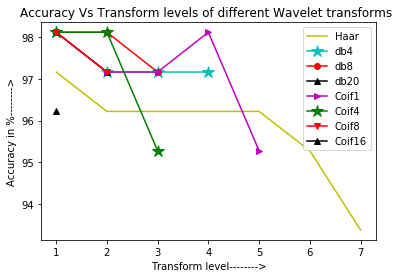

In [1493]:
Accuracy_haar=np.array([93.39,95.28,96.22,96.22,96.22,96.22,97.16])
levels_haar=np.array([7,6,5,4,3,2,1])

Accuracy_db4=np.array([97.16,97.16,97.16,98.11])
levels_db4=np.array([4,3,2,1])

Accuracy_db8=np.array([97.16,98.11,98.11])
levels_db8=np.array([3,2,1])

Accuracy_db20=np.array([97.16,98.11])
levels_db20=np.array([2,1])

Accuracy_coif1=np.array([95.28,98.11,97.16,97.16,98.11])
levels_coif1=np.array([5,4,3,2,1])

Accuracy_coif4=np.array([95.28,98.11,98.11])
levels_coif4=np.array([3,2,1])

Accuracy_coif8=np.array([97.16,98.11])
levels_coif8=np.array([2,1])

Accuracy_coif16=np.array([96.22])
levels_coif16=np.array([1])

    # plot the data observations
plt.plot(levels_haar,Accuracy_haar,color='y',label='Haar')
plt.plot(levels_db4,Accuracy_db4,'-*',markersize=12,color='c',label='db4')
plt.plot(levels_db8,Accuracy_db8,'-o',color='r',label='db8')
plt.plot(levels_db20,Accuracy_db20,'-^',color='k',label='db20')

plt.plot(levels_coif1,Accuracy_coif1,'->',color='m',label='Coif1')
plt.plot(levels_coif4,Accuracy_coif4,'-*',markersize=12,color='g',label='Coif4')
plt.plot(levels_coif8,Accuracy_coif8,'-v',color='r',label='Coif8')
plt.plot(levels_coif16,Accuracy_coif16,'-^',color='k',label='Coif16')
    # plot the centroids
    #lines = plt.plot(centroids[i,0],centroids[i,1],'kx')
#     # make the centroid x's bigger
#     plt.setp(lines,ms=15.0)
#     plt.setp(lines,mew=2.0)
plt.xlabel('Transform level-------->')
plt.ylabel('Accuracy in %-------->')   

plt.title('Accuracy Vs Transform levels of different Wavelet transforms ')
plt.legend(loc=1)
plt.show()

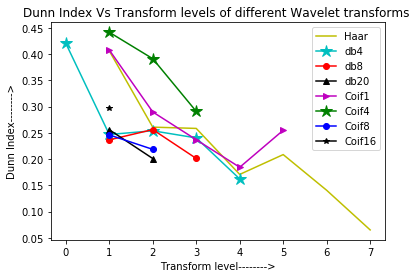

In [1495]:
Dunn_haar=np.array([0.065244511,0.140648587,0.208577313,0.170848467,0.258384175,0.260816263,0.405965118])
levels_haar=np.array([7,6,5,4,3,2,1])

Dunn_db4=np.array([0.162243934,0.240328005,0.253894382,0.246826104,0.420344192])
levels_db4=np.array([4,3,2,1,0])

Dunn_db8=np.array([0.201229118,0.256167734,0.23661518])
levels_db8=np.array([3,2,1])

Dunn_db20=np.array([0.201089462,0.255877273])
levels_db20=np.array([2,1])

Dunn_coif1=np.array([0.254860736,0.18443935,0.236889908,0.289695896,0.40761352])
levels_coif1=np.array([5,4,3,2,1])

Dunn_coif4=np.array([0.290840947,0.391056749,0.441390781])
levels_coif4=np.array([3,2,1])

Dunn_coif8=np.array([0.218523631,0.246045344])
levels_coif8=np.array([2,1])

Dunn_coif16=np.array([0.297830244])
levels_coif16=np.array([1])

    # plot the data observations
plt.plot(levels_haar,Dunn_haar,color='y',label='Haar')
plt.plot(levels_db4,Dunn_db4,'-*',markersize=12,color='c',label='db4')
plt.plot(levels_db8,Dunn_db8,'-o',color='r',label='db8')
plt.plot(levels_db20,Dunn_db20,'-^',color='k',label='db20')


plt.plot(levels_coif1,Dunn_coif1,'->',color='m',label='Coif1')
plt.plot(levels_coif4,Dunn_coif4,'-*',markersize=12,color='g',label='Coif4')
plt.plot(levels_coif8,Dunn_coif8,'-o',color='b',label='Coif8')
plt.plot(levels_coif16,Dunn_coif16,'-*',color='k',label='Coif16')
    # plot the centroids
    #lines = plt.plot(centroids[i,0],centroids[i,1],'kx')
#     # make the centroid x's bigger
#     plt.setp(lines,ms=15.0)
#     plt.setp(lines,mew=2.0)
plt.xlabel('Transform level-------->')
plt.ylabel('Dunn Index-------->')   
plt.title('Dunn Index Vs Transform levels of different Wavelet transforms ')
plt.legend()
plt.show()

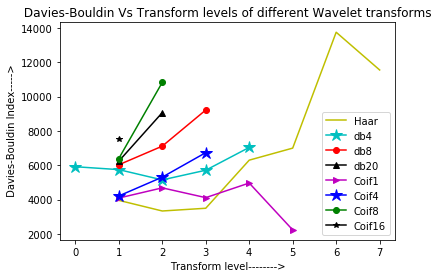

In [1499]:
# DB_haar=np.array([11553.44353,13753.70456,6998.13244,6296.109186,3491.899767,3332.322052,3953.669395])
# levels_haar=np.array([7,6,5,4,3,2,1])

DB_db4=np.array([7038.814047,5708.35446,5145.211501,5744.692198,5913.334801,])
levels_db4=np.array([4,3,2,1,0])

DB_db8=np.array([9218.496379,7112.273171,6025.461724])
levels_db8=np.array([3,2,1])

DB_db20=np.array([9065.277985,6235.317431])
levels_db20=np.array([2,1])

DB_coif1=np.array([2228.757882,4962.746283,4110.585591,4680.743409,4086.403443])
levels_coif1=np.array([5,4,3,2,1])

DB_coif4=np.array([6734.208415,5305.617409,4208.685952])
levels_coif4=np.array([3,2,1])

DB_coif8=np.array([10828.61007,6388.733671])
levels_coif8=np.array([2,1])

DB_coif16=np.array([7502.694171])
levels_coif16=np.array([1])
    # plot the data observations
plt.plot(levels_haar,DB_haar,color='y',label='Haar')
plt.plot(levels_db4,DB_db4,'-*',markersize=12,color='c',label='db4')
plt.plot(levels_db8,DB_db8,'-o',color='r',label='db8')
plt.plot(levels_db20,DB_db20,'-^',color='k',label='db20')


plt.plot(levels_coif1,DB_coif1,'->',color='m',label='Coif1')
plt.plot(levels_coif4,DB_coif4,'-*',markersize=12,color='b',label='Coif4')
plt.plot(levels_coif8,DB_coif8,'-o',color='g',label='Coif8')
plt.plot(levels_coif16,DB_coif16,'-*',color='k',label='Coif16')
    # plot the centroids
    #lines = plt.plot(centroids[i,0],centroids[i,1],'kx')
#     # make the centroid x's bigger
#     plt.setp(lines,ms=15.0)
#     plt.setp(lines,mew=2.0)
plt.xlabel('Transform level-------->')
plt.ylabel(' Davies-Bouldin Index----->')  
plt.title(' Davies-Bouldin Vs Transform levels of different Wavelet transforms ')
plt.legend()
plt.show()

In [ ]:
DB_haar=np.array([11553.44353,13753.70456,6998.13244,6296.109186,3491.899767,3332.322052,3953.669395])
levels_haar=np.array([7,6,5,4,3,2,1])

DB_db4=np.array([7038.814047,5708.35446,5145.211501,5744.692198,5913.334801,])
levels_db4=np.array([4,3,2,1,0])

DB_db8=np.array([9218.496379,7112.273171,6025.461724])
levels_db8=np.array([3,2,1])

DB_db20=np.array([9065.277985,6235.317431])
levels_db20=np.array([2,1])

# Dunn_coif1=np.array([95.28,98.11,97.16,97.16,98.11,])
# levels_coif1=np.array([5,4,3,2,1])

    # plot the data observations
plt.plot(levels_haar,DB_haar,color='y',label='Haar')
plt.plot(levels_db4,DB_db4,'-*',markersize=12,color='c',label='db4')
plt.plot(levels_db8,DB_db8,'-o',color='r',label='db8')
plt.plot(levels_db20,DB_db20,'-^',color='k',label='db20')
    # plot the centroids
    #lines = plt.plot(centroids[i,0],centroids[i,1],'kx')
#     # make the centroid x's bigger
#     plt.setp(lines,ms=15.0)
#     plt.setp(lines,mew=2.0)
plt.xlabel('Transform level-------->')
plt.ylabel('Davis-Bouldin Index-------->')   
plt.legend()
plt.show()

In [ ]:
ds = pca_2d[0:len(pca_2d)/2]
    # plot the data observations
plt.plot(ds[:,0],ds[:,1],'o',color='m')
    # plot the centroids
    #lines = plt.plot(centroids[i,0],centroids[i,1],'kx')
#     # make the centroid x's bigger
#     plt.setp(lines,ms=15.0)
#     plt.setp(lines,mew=2.0)
plt.xlabel('PC1-------->')
plt.ylabel('PC2-------->')    
plt.plot(pca_2d.mean(axis=0),'*')    
plt.show()

## helper functions

In [ ]:
img = images
fig = plt.figure()
c=[]
for i in range(len(labels)):
    if(labels[i]==0):
        c[0].append(images[i])
    elif(labels[i]==1):
        c[1].append(images[i])
    elif(labels[i]==2):
        c[2].append(images[i])
    elif(labels[i]==3): 
        c[3].append(images[i])
    elif(labels[i]==4): 
        c[4].append(images[i])
    

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
fig = plt.figure()
a=fig.add_subplot(1,2,1)
img = images
imgplot = plt.imshow(img[0],cmap='gray')
plt.colorbar(ticks=[0.1,0.3,0.5,0.7], orientation ='horizontal')

plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.random.randn(20)
y = np.random.randn(20)

fig = plt.figure(figsize=(8, 8))

for i in range(0,10):
    ax = fig.add_subplot(5, 2, i+1)
    plt.plot(x, y, 'o')
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)
    # x and y axis should be equal length
    x0,x1 = ax.get_xlim()
    y0,y1 = ax.get_ylim()
    ax.set_aspect(abs(x1-x0)/abs(y1-y0))

plt.show()
fig.savefig('plot.pdf', bbox_inches='tight')

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
fig = plt.figure()
a=fig.add_subplot(1,2,1)
img = mpimg.imread('../_static/stinkbug.png')
lum_img = img[:,:,0]
imgplot = plt.imshow(lum_img)
a.set_title('Before')
plt.colorbar(ticks=[0.1,0.3,0.5,0.7], orientation ='horizontal')
a=fig.add_subplot(1,2,2)
imgplot = plt.imshow(lum_img)
imgplot.set_clim(0.0,0.7)
a.set_title('After')
plt.colorbar(ticks=[0.1,0.3,0.5,0.7], orientation='horizontal'

## Function to rename files in a directory

In [ ]:
directoryName = "C:\Users\ppatnaik\Documents\Smart_city\DataSets\Training_flower\Fruit_training"
filePath = os.path.abspath(directoryName)
filePathWithSlash = filePath + "\\"
filename in enumerate(os.listdir(directoryName)):

for counter, 
    filenameWithPath = os.path.join(filePathWithSlash, filename)

    os.rename(filenameWithPath, filenameWithPath.replace(filename, str(counter+55).zfill(2) + ".jpg" ))


In [ ]:
directoryName = "C:\Users\ppatnaik\Documents\Smart_city\DataSets\Training_flower\fruits"
filePath = os.path.abspath(directoryName)
filePathWithSlash = filePath + "\\"

for counter, filename in enumerate(os.listdir(directoryName)):

    filenameWithPath = os.path.join(filePathWithSlash, filename)

    os.rename(filenameWithPath, filenameWithPath.replace(filename,"FRU_" + \
          str(counter).zfill(2) + ".jpg" ))


In [ ]:
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances

def delta(ck, cl):
    values = np.ones([len(ck), len(cl)])*10000
    
    for i in range(0, len(ck)):
        for j in range(0, len(cl)):
            values[i, j] = np.linalg.norm(ck[i]-cl[j])
            
    return np.min(values)
    
def big_delta(ci):
    values = np.zeros([len(ci), len(ci)])
    
    for i in range(0, len(ci)):
        for j in range(0, len(ci)):
            values[i, j] = np.linalg.norm(ci[i]-ci[j])
            
    return np.max(values)
    
def dunn(k_list):
    """ Dunn index [CVI]
    
    Parameters
    --00000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000--------
    k_list : list of np.arrays
        A list containing a numpy array for each cluster |c| = number of clusters
        c[K] is np.array([N, p]) (N : number of samples in cluster K, p : sample dimension)
    """
    deltas = np.ones([len(k_list), len(k_list)])*1000000
    big_deltas = np.zeros([len(k_list), 1])
    l_range = list(range(0, len(k_list)))
    
    for k in l_range:
        for l in (l_range[0:k]+l_range[k+1:]):
            deltas[k, l] = delta(k_list[k], k_list[l])
        
        big_deltas[k] = big_delta(k_list[k])

    di = np.min(deltas)/np.max(big_deltas)
    return di

def delta_fast(ck, cl, distances):
    values = distances[np.where(ck)][:, np.where(cl)]
    values = values[np.nonzero(values)]

    return np.min(values)
    
def big_delta_fast(ci, distances):
    values = distances[np.where(ci)][:, np.where(ci)]
    #values = values[np.nonzero(values)]
            
    return np.max(values)

def dunn_fast(points, labels):
    """ Dunn index - FAST (using sklearn pairwise euclidean_distance function)
    
    Parameters
    ----------
    points : np.array
        np.array([N, p]) of all points
    labels: np.array
        np.array([N]) labels of all points
    """
    distances = euclidean_distances(points)
    ks = np.sort(np.unique(labels))
    
    deltas = np.ones([len(ks), len(ks)])*1000000
    big_deltas = np.zeros([len(ks), 1])
    
    l_range = list(range(0, len(ks)))
    
    for k in l_range:
        for l in (l_range[0:k]+l_range[k+1:]):
            deltas[k, l] = delta_fast((labels == ks[k]), (labels == ks[l]), distances)
        
        big_deltas[k] = big_delta_fast((labels == ks[k]), distances)

    di = np.min(deltas)/np.max(big_deltas)
    return di
    
    
def  big_s(x, center):
    len_x = len(x)
    total = 0
        
    for i in range(len_x):
        total += np.linalg.norm(x[i]-center)    
    
    return total/len_x

def davisbouldin(k_list, k_centers):
    """ Davis Bouldin Index
    
    Parameters
    ----------
    k_list : list of np.arrays
        A list containing a numpy array for each cluster |c| = number of clusters
        c[K] is np.array([N, p]) (N : number of samples in cluster K, p : sample dimension)
    k_centers : np.array
        The array of the cluster centers (prototypes) of type np.array([K, p])
    """
    len_k_list = len(k_list)
    big_ss = np.zeros([len_k_list], dtype=np.float64)
    d_eucs = np.zeros([len_k_list, len_k_list], dtype=np.float64)
    db = 0    

    for k in range(len_k_list):
        big_ss[k] = big_s(k_list[k], k_centers[k])

    for k in range(len_k_list):
        for l in range(0, len_k_list):
            d_eucs[k, l] = np.linalg.norm(k_centers[k]-k_centers[l])

    for k in range(len_k_list):
        values = np.zeros([len_k_list-1], dtype=np.float64)
        for l in range(0, k):
            values[l] = (big_ss[k] + big_ss[l])/d_eucs[k, l]
        for l in range(k+1, len_k_list):
            values[l-1] = (big_ss[k] + big_ss[l])/d_eucs[k, l]

        db += np.max(values)
    res = db/len_k_list
    return res